In [8]:
import matplotlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import xarray as xr
from IPython.display import HTML
import numpy as np
import rioxarray
import json

In [16]:
historical = xr.open_dataarray("../data/01_raw/destine/IFS_FESOM_storyline/latlon_new/hist/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_iberia.nc")
plus2k = xr.open_dataarray("../data/01_raw/destine/IFS_FESOM_storyline/latlon_new/2K/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_iberia.nc")

In [3]:
def plot_compare_2k(historical: str, sceneario: str) -> animation:
    hist_da = xr.open_dataarray(historical)
    plus2k_da = xr.open_dataarray(sceneario)

    fig, ax = plt.subplots(1, 2, figsize=[12,6])


    vmin = float(plus2k_da.min())
    vmax = float(plus2k_da.max())

    def plot_step(time):
        """Plot a time step of the animation."""
        plus2k_da.isel(time=time).plot(ax=ax[0], add_colorbar=False,  vmin=vmin, vmax=vmax, cmap="winter")
        hist_da.isel(time=time).plot(ax=ax[1], add_colorbar=False, vmin=vmin, vmax=vmax, cmap="winter")

    return animation.FuncAnimation(fig, plot_step, 24, interval=50, blit=False)

In [17]:
historical = historical.rio.write_crs("EPSG:4326").rename(lat="y", lon="x")

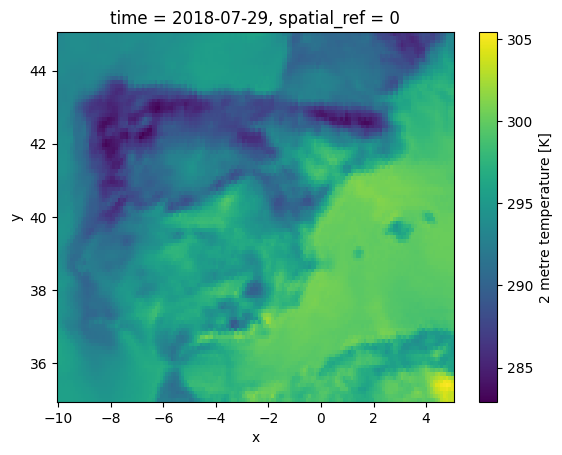

In [18]:
historical.isel(time=0).plot()

In [19]:
with open("../data/01_raw/peninsula.geojson") as f:
    geom = json.load(f)

cliped_iberia = historical.rio.clip([geom])

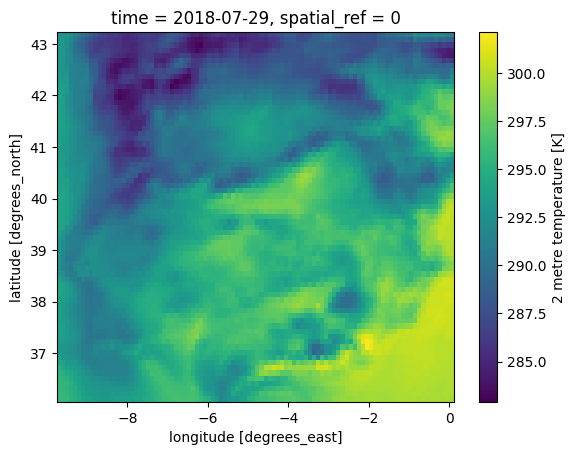

In [22]:
cliped_iberia.isel(time=0).plot()

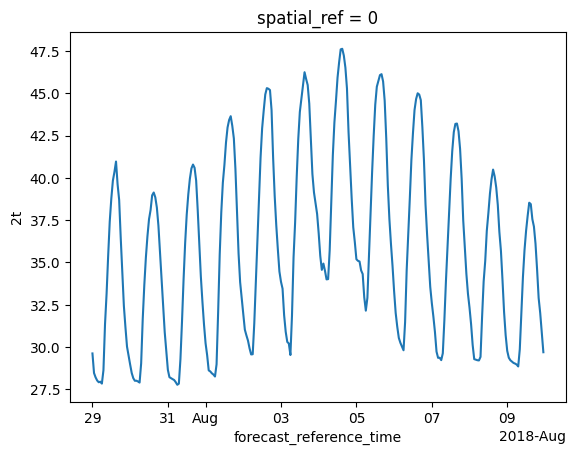

In [23]:
(cliped_iberia.max(dim=['x', 'y']) - 272.5).plot()

## Europe

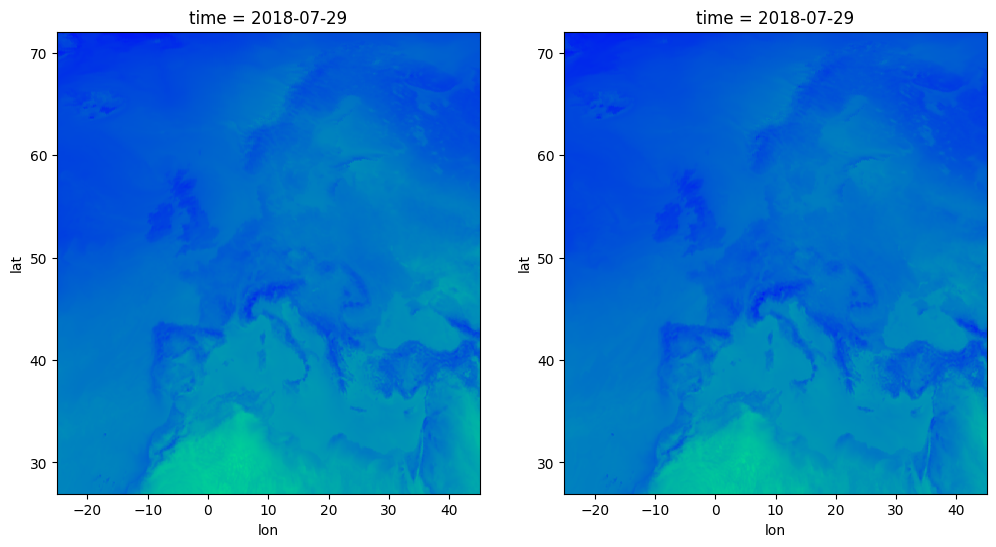

In [13]:
ani = plot_compare_2k(
    "../../../digital-twins/science/data/01_raw/destine/IFS_FESOM_storyline/latlon_new/hist/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_europe.nc",
    "../../../digital-twins/science/data/01_raw/destine/IFS_FESOM_storyline/latlon_new/2K/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_europe.nc"
    )
# HTML(ani.to_jshtml())

In [ ]:
ani.save('animation_temp.gif', writer='imagemagick', fps = 10)

In [ ]:
hist

In [ ]:
import matplotlib.colorbar

fig,(ax,cax) = plt.subplots(1,2, gridspec_kw={"width_ratios":[50,1]})

cmap = matplotlib.cm.RdBu_r
norm = matplotlib.colors.CenteredNorm(halfrange=10)

cb = matplotlib.colorbar.ColorbarBase(cax, cmap=cmap, norm=norm, orientation="vertical")


diff = xr.open_dataarray(plus2k) - xr.open_dataarray(hist)

def plot_step(time):
    """Plot a time step of the animation."""
    diff.isel(time=time).plot(add_colorbar=False, ax=ax, cmap=cmap, norm=norm)

ani = animation.FuncAnimation(fig, plot_step, 24, interval=50, blit=False)

HTML(ani.to_jshtml())

In [ ]:
ani.save('animation_diff.gif', writer='imagemagick', fps = 10)

In [ ]:
v_component = xr.load_dataarray("../data/destine/IFS_FESOM_storyline_plus2K/2018_01_01_T00_00_to_2018_01_02_T23_00_10v_raw_data.nc")
u_component = xr.load_dataarray("../data/destine/IFS_FESOM_storyline_plus2K/2018_01_01_T00_00_to_2018_01_02_T23_00_10u_raw_data.nc")
complx = 1j * v_component
complx += u_component
complx.sel(time="2018-01-10T00:00:00", method="nearest").imag.plot()


## Peninsula

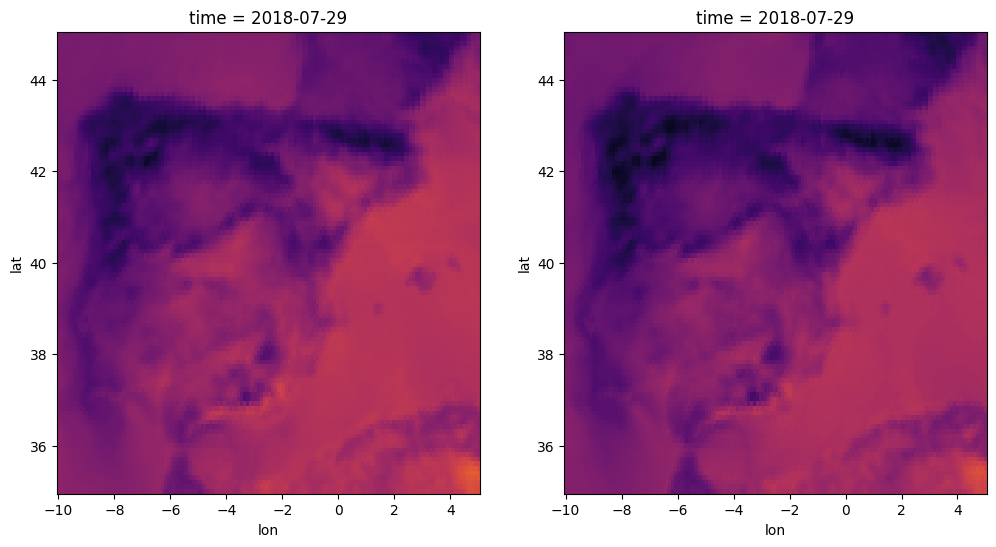

In [10]:
ani = plot_compare_2k(
    "../data/01_raw/destine/IFS_FESOM_storyline/latlon_new/hist/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_iberia.nc",
    "../data/01_raw/destine/IFS_FESOM_storyline/latlon_new/2K/2018_07_29_T00_00_to_2018_08_09_T23_00_2t_iberia.nc"
    )
HTML(ani.to_jshtml())